# fCO₂ Calculation
This notebook explores the influence of various parameters on the calculation of fCO₂.

The standard fCO₂ calculation requires:
- pCO₂
- xCO₂
- Pressure
- Temperature

The SAMI sensor reports only temperature and pCO₂, so we need to find out how we can substitute values to get to fCO₂.

We'll set up an example SAMI output and vary the missing parameters to see how they impact the calculated fCO₂.

In [1]:
import math
import numpy as n
from matplotlib import pyplot

# Theoretical SAMI output
temperature = 25.0
pco2 = 375

# Default values for missing parameters
default_pressure = 1013.25
default_xco2 = 375

# hPa to Atmospheres converter
def hpaToAtmospheres(hpa):
    return hpa * 100 * 0.00000986923266716013

# Function to calculate fco2
def calc_fco2(pco2, xco2, pressure, temperature):
    kelvin = temperature + 273.15
    B = -1636.75 + 12.0408 * kelvin - 0.0327957 * pow(kelvin, 2) + (3.16528 * 1e-5) * pow(kelvin, 3)
    delta = 57.7 - 0.118 * kelvin

    return pco2 * math.exp(((B + 2 * pow(1 - xco2 * 1e-6, 2) * delta) * hpaToAtmospheres(pressure)) / (82.0575 * kelvin))

## Pressure

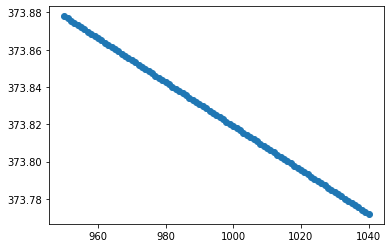

In [2]:
pressure_min = 950
pressure_max = 1040
pressures = range(pressure_min, pressure_max + 1)

p_fco2s = [None]*len(pressures)

for i in range(0, len(pressures)):
    p_fco2s[i] = calc_fco2(pco2, default_xco2, pressures[i], temperature)

pyplot.scatter(pressures, p_fco2s)

## xCO₂

373.8034286838584
373.80342730813425
373.8034259324115
373.8034245566901
373.8034231809701
373.8034218052515
373.8034204295343
373.80341905381846
373.8034176781039
373.8034163023909
373.8034149266791
373.80341355096886
373.8034121752599
373.80341079955235
373.8034094238462
373.80340804814136
373.8034066724379
373.8034052967359
373.8034039210352
373.8034025453359
373.80340116963805
373.80339979394154
373.8033984182464
373.80339704255266
373.8033956668603
373.8033942911693
373.8033929154797
373.80339153979145
373.8033901641046
373.80338878841917
373.80338741273505
373.80338603705235
373.80338466137107
373.8033832856911
373.8033819100126
373.80338053433536
373.8033791586596
373.8033777829852
373.80337640731216
373.8033750316405
373.80337365597023


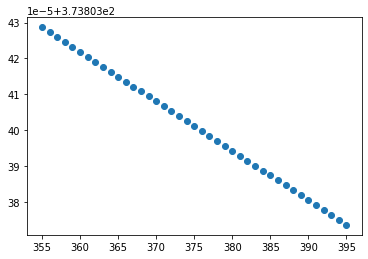

In [3]:
xco2_min = pco2 - 20
xco2_max = pco2 + 20
xco2s = range(xco2_min, xco2_max + 1)

x_fco2s = [None]*len(xco2s)

for i in range(0, len(xco2s)):
    x_fco2s[i] = calc_fco2(pco2, xco2s[i], default_pressure, temperature)
    print(x_fco2s[i])

pyplot.scatter(xco2s, x_fco2s)